# 911 Calls Capstone Project
---

For this capstone projects you will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/datasets/mchirico/montcoalert). This data contains the following fields:
* lat: String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable YYYY-MM-DD- HH:MM:SS
* twp: String variable, Address
* addr: String variable, Address
* e, String variable, Dummy variable (always 1)

Just go along with this notebook and complete the instructions or answer the questions in bold using your Python and Data Science skills.  

## Data and Setup
---

**Import numpy and pandas**

In [1]:
import numpy as np
import pandas as pd

**Get Data From Kaggle**

In [3]:
import os
import kagglehub

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mchirico/montcoalert")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jeffh\.cache\kagglehub\datasets\mchirico\montcoalert\versions\32


**Import visualization libraries and set %matplotlib inline.**

In [7]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed inline in Jupyter Notebook
%matplotlib inline

# Set a default style for the plots
sns.set(style="darkgrid")

**Read in the csv file as a dataframe called df**


In [9]:
data_file_path = os.path.join(path, "911.csv")
df = pd.read_csv(data_file_path)

**Check the info() of the df**


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


**Check the head of df**

In [13]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions
---

**What are the top 5 zipcodes for 911 calls?**

In [ ]:
top_5_zips = df['zip'].value_counts().head()
top_5_zips.index = top_5_zips.index.astype(int)
top_5_zips

**What are the top 5 townships (twp) for 911 calls?**


In [15]:
df['twp'].value_counts().head()

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**


In [17]:
df['title'].nunique()

148

## Creating new features
---

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [21]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
# df['Reason']

**What is the most common Reason for a 911 call based off of this new column?**


In [23]:
df['Reason'].value_counts()

Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

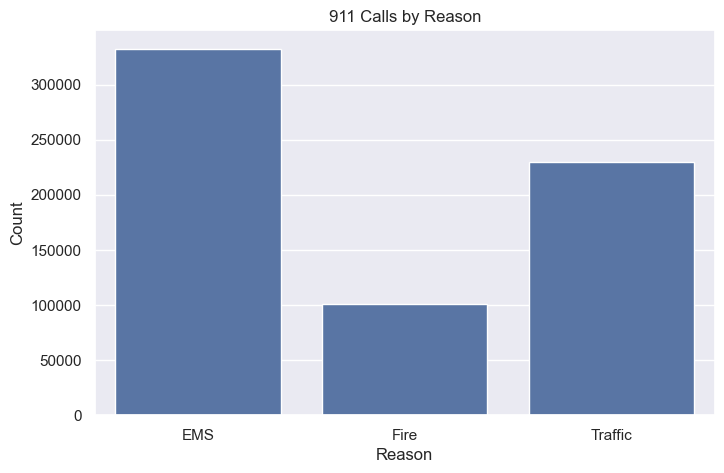

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Reason')
plt.title("911 Calls by Reason")
plt.xlabel("Reason")
plt.ylabel("Count")
plt.show()

---

**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [ ]:
df['timeStamp'].dtypes

**You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**


In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.day_name()) 
df.head()

**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
df['Day of Week'] = df['timeStamp'].dt.dayofweek
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [ ]:
df['Day of Week'] = df['Day of Week'].map(dmap)
df

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Day of Week', hue='Reason', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('911 Calls by Day of Week and Reason')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title='Reason')
plt.show()

**Now do the same for Month:**

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', hue='Reason', order=range(1, 13))
plt.title('911 Calls by Month and Reason')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Reason')
plt.show()

**Did you notice something strange about the Plot?**
---
**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [ ]:
byMonth = df.groupby('Month').count()
byMonth

**Now create a simple plot off of the dataframe indicating the count of calls per month.**

In [ ]:
plt.figure(figsize=(10, 6))
byMonth['timeStamp'].plot()

In [ ]:
plt.title('911 Calls Per Month')
plt.xlabel('Month')
plt.ylabel('Count of Calls')
plt.xticks(ticks=range(1, 13), labels=range(1, 13))  # Ensure all months are shown
plt.grid(True)
plt.show()

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**


In [ ]:
byMonth_reset = byMonth.reset_index()
sns.lmplot(data=byMonth_reset, x='Month', y='timeStamp', height=6, aspect=1.5)

In [ ]:
plt.title('Linear Fit of 911 Calls Per Month')
plt.xlabel('Month')
plt.ylabel('Count of Calls')
plt.grid(True)
plt.show()

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

In [ ]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [ ]:
calls_by_date = df.groupby('Date').count()

In [ ]:
plt.figure(figsize=(10, 6))
calls_by_date['timeStamp'].plot()

In [ ]:
plt.title('911 Calls per Day')
plt.xlabel('Date')
plt.ylabel('Count of Calls')
plt.grid(True)
plt.show()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [ ]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [ ]:
for reason in df['Reason'].unique():
    calls_by_date = df[df['Reason'] == reason].groupby('Date').count()
    
    plt.figure(figsize=(10, 6))
    calls_by_date['timeStamp'].plot()
    
    plt.title(f'911 Calls per Day for {reason}')
    plt.xlabel('Date')
    plt.ylabel('Count of Calls')
    plt.grid(True)
    plt.show()

---

**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

**Now create a HeatMap using this new DataFrame.**

In [ ]:
df['Day of Week'] = df['timeStamp'].dt.dayofweek
df['Hour'] = df['timeStamp'].dt.hour
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
heatmap_data = df.groupby(['Day of Week', 'Hour']).count()['timeStamp'].unstack()
print(heatmap_data)

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('911 Calls Heatmap by Day of Week and Hour')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.show()

**Now create a clustermap using this DataFrame.**

In [ ]:
sns.clustermap(heatmap_data, cmap='coolwarm', linewidths=0.5, figsize=(12, 8))
plt.title('911 Calls Clustermap by Day of Week and Hour', pad=50)  # Pad adjusts the title's position
plt.show()

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [ ]:
heatmap_data_month = df.groupby(['Day of Week', 'Month']).count()['timeStamp'].unstack()
heatmap_data_month = heatmap_data_month.fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_month, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('911 Calls Heatmap by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.show()

In [ ]:
sns.clustermap(heatmap_data_month, cmap='coolwarm', linewidths=0.5, figsize=(12, 8))
plt.title('911 Calls Clustermap by Day of Week and Month', pad=50)
plt.show()